# ECG Abnormal/Normal Classification

By taking ECG Data of abnormal and normal heartbeats, we are able to 
programmatically classify them by training a model using a large data set

The method of classifcation we will be using is a 
[decision tree classifier](https://www.ibm.com/in-en/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes. "Decision Tree")

Order of operation: 
1. Define Files
2. Determine Data Arcitecture
3. Train data set to identify normal and non normal
4. (Possibly) identify which person in heart_disease.csv is most likely to have which pulse

In [83]:
# Defining our imports 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree

In [84]:
# Here we want to define what data we are working with
fileNames = []
for dirname, _, filenames in os.walk('data_sets'):
    for filename in filenames:
        fileNames.append(os.path.join(dirname, filename))

In [85]:
# Defining our normalECG data path
healthDiseasePath = ''
normalECGPath = ''
abnormalECGPath = ''
for s in fileNames: 
    if 'health' in s: 
        healthDiseasePath = s
    elif 'abnormal' in s:
        abnormalECGPath = s
    elif 'normal' in s: 
        normalECGPath = s

# Now we can read the csv using pandas
dfAbnormal = pd.read_csv(normalECGPath, header=None)
dfNormal   = pd.read_csv(abnormalECGPath, header=None)

# Defining the shape of our data
abnormalRow, abnormalCol = dfAbnormal.shape
normalRow, normalCol = dfNormal.shape

### A bit of data visualization in order to understand what's going on

### Here we can see the difference between abnormal and normal ECG waves, 

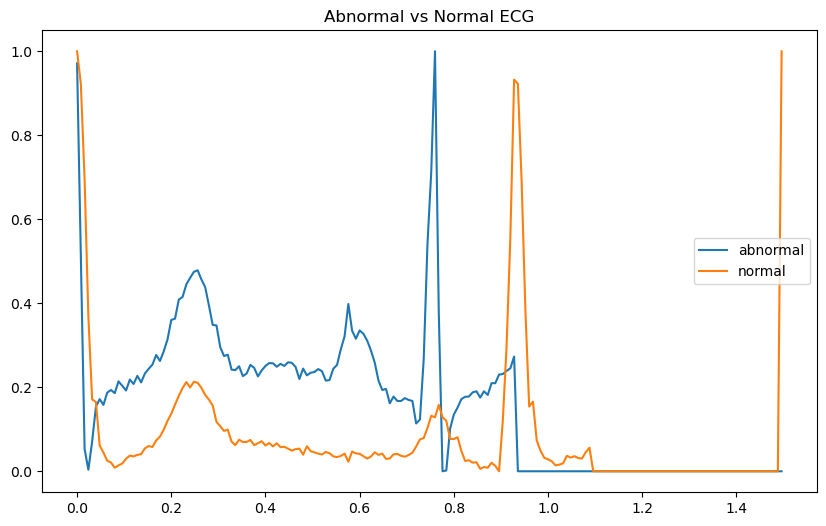

In [86]:
# Frequency
frequency = 125 # Hz

# Index (this is kind of random, just want to display 1 person's pulse)
randIndex = 19

times = [1/frequency * index for index in range(len(dfAbnormal.loc[randIndex]))] # seconds 

fig, (ax1) = plt.subplots(1,1, figsize=(10,6))
ax1.plot(times, dfAbnormal.loc[randIndex], label='abnormal') 
ax1.plot(times, dfNormal.loc[randIndex], label='normal') 
ax1.set_title("Abnormal vs Normal ECG")
ax1.legend()

Text(0.5, 1.0, 'STD for heart data')

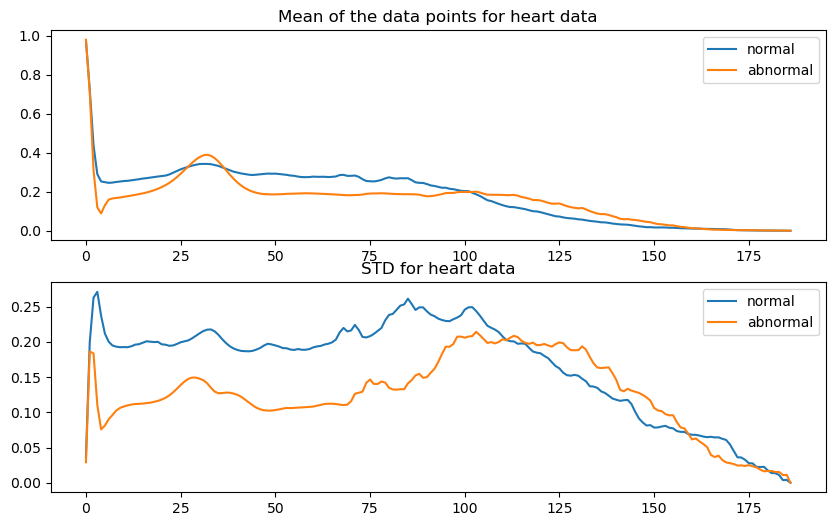

In [87]:
# Lets get some simple statistics just to verify that
# training our model is worthwile

# Taking the mean of each row
_, (ax1,ax2) = plt.subplots(2,1, figsize=(10,6))
ax1.plot(dfNormal.loc[:,:normalCol - 2].mean(), label='normal')
ax1.plot(dfAbnormal.loc[:,:normalCol - 2].mean(), label='abnormal')
ax1.set_title("Mean of the data points for heart data")
ax1.legend()

# Taking the standard deviation of each row
ax2.plot(dfNormal.loc[:,:normalCol - 2].std(), label='normal')
ax2.plot(dfAbnormal.loc[:,:normalCol - 2].std(), label='abnormal')
ax2.legend()
ax2.set_title("STD for heart data")

In [88]:
# Since there are some meaningful statistics that distinguish 
# The set, we can start trying to train...
# Concat simply just combines the two data sets...
all_heart_data = pd.concat([dfAbnormal, dfNormal], axis=0, ignore_index=True)
allRow, allCol = all_heart_data.shape
print(f'previous row: {normalRow}, new row: {allRow}')
print(f'previous col: {normalCol}, new col: {allCol}')

previous row: 10506, new row: 14552
previous col: 188, new col: 188


In [89]:
# Look!!! Now we have one data set, with 2 objects defined,
# these 2 objects can be used to distinguish 
# abnormal or normal columns when passed through 
# a decision tree
all_heart_data.loc[:,187].value_counts() # Normal == 1, abnormal == 2

1.0    10506
0.0     4046
Name: 187, dtype: int64

In [90]:
# Because we concatinated, we know that the values that 
# distinquish the norm/abnorm sets are defined at the very last row
# Lets define this row as our feature
feature = all_heart_data.loc[:,allCol - 1]

# The rest of the data, can be defined as our target
target = all_heart_data.loc[:,:allCol - 2]


In [91]:
# Split matrices into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.3, random_state=0)

In [101]:
# Generating our decision tree model
dec_tree_model = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)
dec_tree_model.fit(y_train, x_train)

DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)

In [102]:
# Finding a Random Prediction Test Value to see if we worked
predicted = dec_tree_model.predict([y_test.iloc[0,:]])
print('predict value using the DecisionTreeClassifier model: ', end='')
print(predicted)
print('The true value: ',end='')
print(x_test.iloc[0])

predict value using the DecisionTreeClassifier model: [1.]
The true value: 1.0


### The important part -- Getting our accuracy scores
Here we can see that our accuracy was 100% on the trained data, and 91.1% on Test Data

In [103]:
# Printing Scores
print(f'The accuracy of the DecisionTreeClassifier model on train data = {dec_tree_model.score(y_train,x_train)*100:.5}%')
print(f'The accuracy of the DecisionTreeClassifier model on test data = {dec_tree_model.score(y_test,x_test)*100:.3}%')

The accuracy of the DecisionTreeClassifier model on train data = 95.288%
The accuracy of the DecisionTreeClassifier model on test data = 91.1%


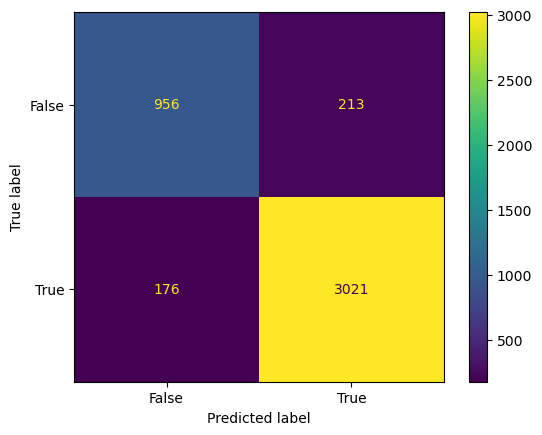

In [104]:
predicted = dec_tree_model.predict(y_test)
actual =  x_test
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Using our own data ... This is mostly debug

In [100]:
df = pd.read_csv('data_sets/Raphs_ECG2_formatted.csv')

df.pop('Unnamed: 0')

df = df.transpose()

toPredict = df.iloc[0,:]

raphPrediction = dec_tree_model.predict([toPredict])

print(raphPrediction)

[1.]


In [107]:
list = [1,2,3,4]

list[1:2]

[2]